In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [21]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape, x_train[0:3,:50]
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
     

x_train shape: (8982, 10000)
x_test shape: (2246, 10000)


In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [24]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [25]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [ ]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [26]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 2.7255 - accuracy: 0.4964 - val_loss: 1.8844 - val_accuracy: 0.5900
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.5796 - accuracy: 0.6670 - val_loss: 1.4187 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.2088 - accuracy: 0.7397 - val_loss: 1.2178 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.9882 - accuracy: 0.7854 - val_loss: 1.1064 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8247 - accuracy: 0.8200 - val_loss: 1.0275 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6903 - accuracy: 0.8475 - val_loss: 0.9714 - val_accuracy: 0.7840
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5811 - accuracy: 0.8758 - val_loss: 0.9464 - val_accuracy: 0.7890
Epoch 8/20
16

In [28]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 1s 60ms/step - loss: 2.4720 - accuracy: 0.5677 - val_loss: 1.6373 - val_accuracy: 0.6720
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.3414 - accuracy: 0.7294 - val_loss: 1.2085 - val_accuracy: 0.7520
Epoch 3/20
16/16 [==============================] - 1s 70ms/step - loss: 0.9688 - accuracy: 0.7983 - val_loss: 1.0305 - val_accuracy: 0.7900
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: 0.7548 - accuracy: 0.8465 - val_loss: 0.9262 - val_accuracy: 0.8030
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6079 - accuracy: 0.8789 - val_loss: 0.8680 - val_accuracy: 0.8140
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4979 - accuracy: 0.9024 - val_loss: 0.8258 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4149 - accuracy: 0.9163 - val_loss: 0.8042 - val_accuracy: 0.8130
Epoch 8/20
16

4/4 [==============================] - 0s 3ms/step
1.0
29/29 [==============================] - 0s 2ms/step
1.0


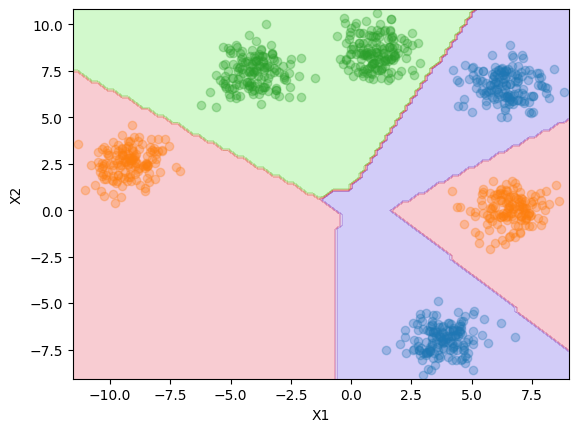

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
import numpy as np

class MLP(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, hidden_layer_sizes=[5]):
    self.max_iter = max_iter
    self.hidden_layer_sizes = hidden_layer_sizes

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)

    self.model = keras.models.Sequential()
    self.model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))

    for h in self.hidden_layer_sizes:
      self.model.add(keras.layers.Dense(h, activation='relu'))

    self.model.add(keras.layers.Dense(yhot.shape[1]))
    self.model.add(keras.layers.Activation('softmax'))

    self.model.compile(loss='categorical_crossentropy')
    self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)
    return self

  def predict_proba(self, X, y=None):
    return self.model.predict(X)

  def predict(self, X):
    predictions = self.model.predict(X)
    ypred = self.labels[np.argmax(predictions, axis=1)]
    return ypred

mlp = MLP(hidden_layer_sizes=[5,4])
mlp.fit(Xtr, ytr)
print(accuracy(ytr, mlp.predict(Xtr)))
plotaDatasetBidimensional(Xte, yte)
plot_predictions(mlp, Xte)
print(accuracy(yte, mlp.predict(Xte)))

In [ ]:
print(mlp.model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________
None
